In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Q1

In [111]:
def resolutionSystem1Euler(alpha,beta,delta,gamma,y0,z0,t0,dt,N):
    "Cette fonctipn permet de resoudre le système (1)"
    temps = np.arange(0,N)*dt+t0 # si j'ai bien compris la question (dt=10/(N-1) pour 10 années)
    y = [y0]
    z = [z0]
    for i in range(N-1):
        y.append(y[i]+dt*y[i]*(alpha-beta*z[i]))
        z.append(z[i]+dt*z[i]*(delta*y[i]-gamma))

    return temps,y,z

In [112]:
def h(y,z,alpha,beta,delta,gamma) :

    return y*(alpha-beta*z),z*(delta*y-gamma)

In [113]:
def resolutionSystem1EulerRK4(alpha,beta,delta,gamma,y0,z0,t0,dt,N):
    "Cette fonctipn permet de resoudre le système (1)"
    temps = np.arange(0,N)*dt+t0 # si j'ai bien compris la question (dt=10/(N-1) pour 10 années)
    y = [y0]
    z = [z0]
    for i in range(N-1):
        k1 = h(y[i],z[i],alpha,beta,delta,gamma)
        k2 = h(y[i]+0.5*dt*k1[0],z[i]+0.5*dt*k1[1],alpha,beta,delta,gamma)
        k3 = h(y[i]+0.5*dt*k2[0],z[i]+0.5*dt*k2[1],alpha,beta,delta,gamma)
        k4 = h(y[i]+dt*k3[0],z[i]+dt*k3[1],alpha,beta,delta,gamma)
        y.append(y[i]+(dt/6)*(k1[0]+2*k2[0]+2*k3[0]+k4[0]))
        z.append(z[i]+(dt/6)*(k1[1]+2*k2[1]+2*k3[1]+k4[1]))

    return temps,y,z

# Q2

In [129]:
Nsamples = 10000
alpha = np.random.lognormal(0.5,0.2,Nsamples)
beta = np.random.lognormal(0.05,0.02,Nsamples)
delta = np.random.lognormal(0.05,0.02,Nsamples)
gamma = np.random.lognormal(0.5,0.2,Nsamples)
y0 = np.random.lognormal(1,1,Nsamples)
z0 = np.random.lognormal(1,1,Nsamples)

In [135]:
N = 100001
dt = 20/(N-1) # pour trouver l'indice de l'année k=année/dt
t0 = 1900
solution = resolutionSystem1EulerRK4(alpha,beta,delta,gamma,y0,z0,t0,dt,N)

In [116]:
def MC(samples):

    mean = np.mean(samples) 
    sigma2 = np.mean(samples**2)-mean**2
    return mean, sigma2

### t0=1900

In [117]:
bins = [x+ 0.5 for x in range(-1, 30)]

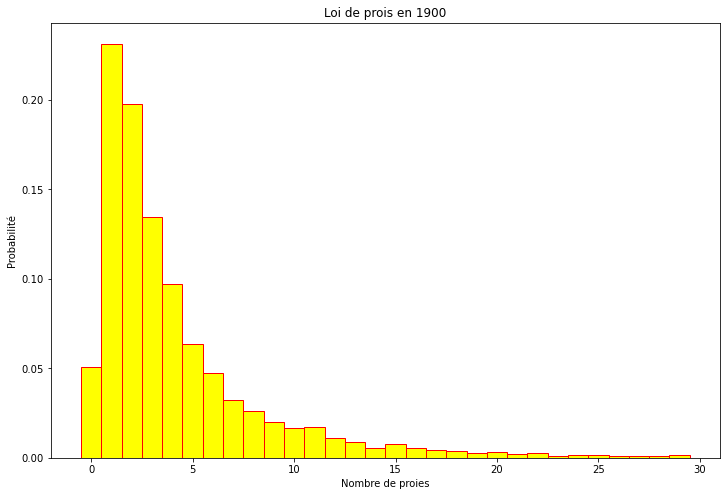

In [136]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(y0),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1900')
plt.show()

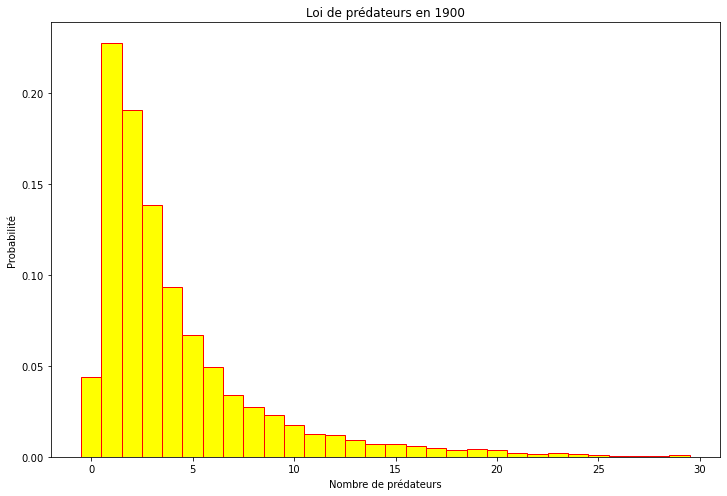

In [137]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(z0),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1900')
plt.show()

### t1=1901

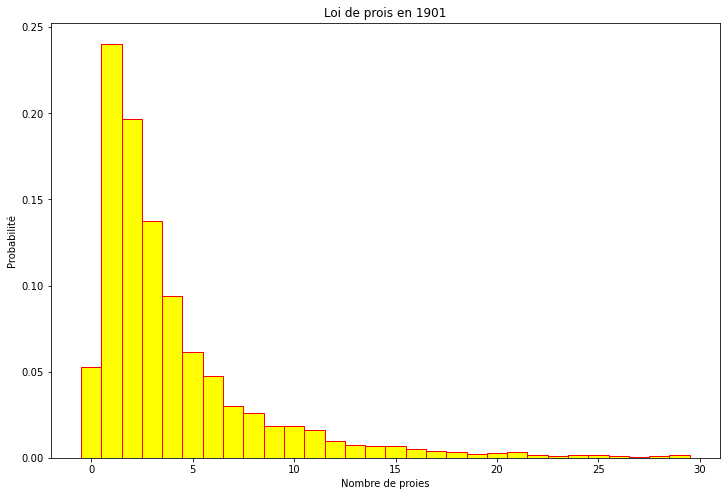

In [138]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(solution[1][50]),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1901')
plt.show()

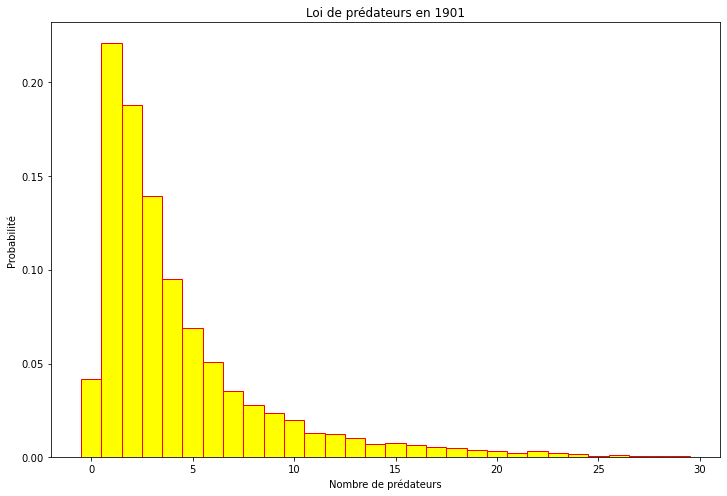

In [139]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(solution[2][50]),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1901')
plt.show()

### t2=1920

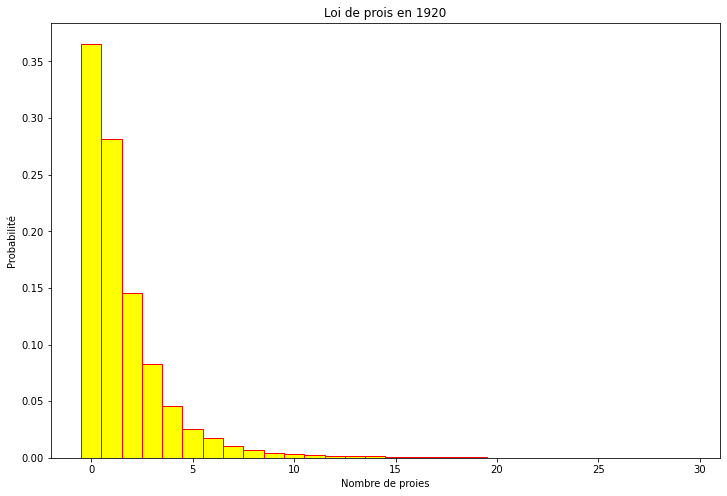

In [145]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(solution[1][-1]),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de proies')
plt.ylabel('Probabilité')
plt.title('Loi de prois en 1920')
plt.show()

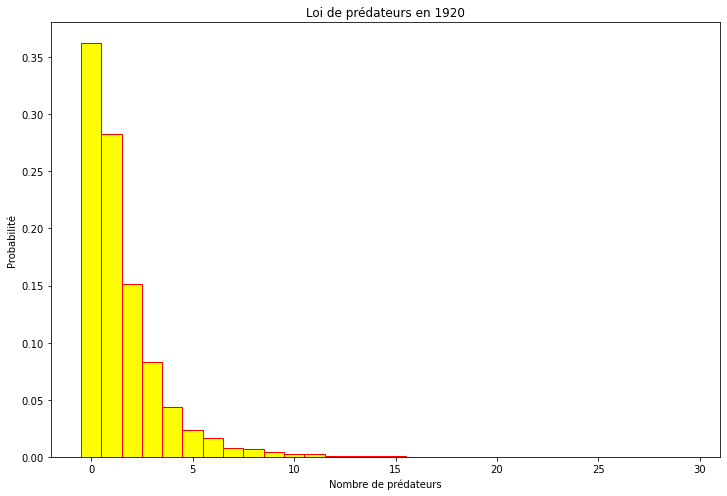

In [146]:
plt.figure(figsize=(12,8),
           facecolor='white')
plt.hist(np.round(solution[2][-1]),  bins = bins, color = 'yellow',
            edgecolor = 'red',density=True,histtype = 'bar')
plt.xlabel('Nombre de prédateurs')
plt.ylabel('Probabilité')
plt.title('Loi de prédateurs en 1920')
plt.show()

### la solution moyenne de l'ED I=E(f(X)) ???